# Bay Area Bike Share (Aug 2013 - Aug 2015)
### Sachin Dabas | Samarth Gowda | Kevin Chian
### Carnegie Mellon University - Interactive Data Science (05839)
### Helsinki - SanFrancisco Comparision - An Urban Transport Study

### GOAL
With the global rise in population and increasing crowd in the city, there is a need to identify the sustainable transport solutions. One of the cities in US with the highest bike infrastructure(potential solution) is San Francisco; which has a growing bike-share program for residents and tourists alike. As of 2019, the city by the bay counted over 10.8 million bikes and added 670 bike racks, according to SF MTA data.

#### What is this a relevant study?
Although the addition of bikes to the stations provides an opportunity to cater to need, it also projects inefficiency at most times of the year. In order to investigate the useage of bike systems we performed an EDA on bike systems in San Francisco and Helsinki and observed that the bike rides are only used x% of the total amount or availability. Our goal for the project is to investigate the bike ride systems and the factors that could help to improve the efficiency of the system.  

### Method

In order to identify the requirement of each station, we will use Machine learning methods to predict the requirement of bikes based on useage and time.

### How does weather affect the rides - San Francisco vs Helsinki

San Francisco has a warm-summer Mediterranean climate characteristic of California's coast, with moist, mild winters and dry summers.San Francisco's weather is strongly influenced by the cool currents of the Pacific Ocean on the west side of the city, and the water of San Francisco Bay to the north and east. This moderates temperature swings and produces a remarkably mild year-round climate with little seasonal temperature variation.

Helsinki has a humid continental climate. Owing to the mitigating influence of the Baltic Sea and North Atlantic Current, temperatures during the winter are higher than the northern location might suggest, with the average in January and February around −4 °C (25 °F).

### Story 
1. Talk about increasing population and crowd in the cities. (48% increase till 2050) - Graph showing that 
2. How this will impact the cities? More people means more need for infrastructure and facilities. But how will be cater for that?
3. We have already started looking for sustainable solutions - bike systems instead of cars (example helsinki)
4. How one bike takes less amount of space required by same amount of people wrt to cars.
5. Talk about San Francisco bike rides and requirement
6. On what factors are these depended on? weather, month, time of day , time of week?
7. Visualize city network on the San Francisco map
8. Time of day availability

## Research Questions

### How can we improve the growing bike-ride system efficiency to decongest the city??  


## EDA explorations:
#### which month has the most number of trips?
#### which city have the most number of trips?
#### which stations often run out of bikes?
#### what is the average time for a ride?
#### how does the weather affect rate of rental?
#### what are the most common routes?
#### Does the installation date of the station affect the number of rented bikes?
#### what is the longest time for a trip?
#### does subscribers rent bikes for longer time than non-subscribers?

## Solution
Predicting the number of required bikes at bike stations in San Francisco

### The Dataset
This dataset is from the San Francisco Bay Area Bike Share database from August 2013 to August 2015. The bike share is meant to provide people in the Bay Area an easy way to travel around. The dataset is provided as a SQL database and a series of csv files. 

The database and files are available on Kaggle at the following [link](https://www.kaggle.com/benhamner/sf-bay-area-bike-share).

The tables/csv that are available for us to use are `station`, `status`, `trip`, and `weather`. We are interested in combining the trip, station, and weather to create a dataset for each trip. 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pandas_profiling import ProfileReport
import geopandas as gpd

%matplotlib inline

In [7]:
# INITIALIZING SQLLITE
import sqlite3

DATABASE_PATH = './data/sf/database.sqlite'
conn = sqlite3.connect(DATABASE_PATH)
cursor = conn.cursor()

In [8]:
def run_query(query):
    cursor.execute(query)
    return cursor.fetchall()

def run_pd_query(query):
    return pd.read_sql(query, conn)

### Taking a closer look at our database

In [9]:
# Tables in the database
SELECT_MASTER_QUERY = 'SELECT * FROM sqlite_master'
run_pd_query(SELECT_MASTER_QUERY)

type     name tbl_name  rootpage  \
0  table  station  station         2   
1  table   status   status         3   
2  table     trip     trip         4   
3  table  weather  weather         5   

                                                 sql  
0  CREATE TABLE station (\n    id INTEGER PRIMARY...  
1  CREATE TABLE status (\n    station_id INTEGER,...  
2  CREATE TABLE trip (\n    id INTEGER PRIMARY KE...  
3  CREATE TABLE weather (\n    date TEXT,\n    ma...

In [10]:
# columns in the trip table
run_pd_query("PRAGMA table_info(trip);")

cid                name     type  notnull dflt_value  pk
0     0                  id  INTEGER        0       None   1
1     1            duration  INTEGER        0       None   0
2     2          start_date     TEXT        0       None   0
3     3  start_station_name     TEXT        0       None   0
4     4    start_station_id  INTEGER        0       None   0
5     5            end_date     TEXT        0       None   0
6     6    end_station_name     TEXT        0       None   0
7     7      end_station_id  INTEGER        0       None   0
8     8             bike_id  INTEGER        0       None   0
9     9   subscription_type     TEXT        0       None   0
10   10            zip_code  INTEGER        0       None   0

In [11]:
# columns in the station table
run_pd_query("PRAGMA table_info(station);")

cid               name     type  notnull dflt_value  pk
0    0                 id  INTEGER        0       None   1
1    1               name     TEXT        0       None   0
2    2                lat  NUMERIC        0       None   0
3    3               long  NUMERIC        0       None   0
4    4         dock_count  INTEGER        0       None   0
5    5               city     TEXT        0       None   0
6    6  installation_date     TEXT        0       None   0

In [12]:
# columns in the weather table
run_pd_query("PRAGMA table_info(weather);")

cid                            name     type  notnull dflt_value  pk
0     0                            date     TEXT        0       None   0
1     1               max_temperature_f  INTEGER        0       None   0
2     2              mean_temperature_f  INTEGER        0       None   0
3     3               min_temperature_f  INTEGER        0       None   0
4     4                 max_dew_point_f  INTEGER        0       None   0
5     5                mean_dew_point_f  INTEGER        0       None   0
6     6                 min_dew_point_f  INTEGER        0       None   0
7     7                    max_humidity  INTEGER        0       None   0
8     8                   mean_humidity  INTEGER        0       None   0
9     9                    min_humidity  INTEGER        0       None   0
10   10   max_sea_level_pressure_inches  NUMERIC        0       None   0
11   11  mean_sea_level_pressure_inches  NUMERIC        0       None   0
12   12   min_sea_level_pressure_inches  NUMERIC        0       None   0
13   13            max_visibility_miles  INTEGER        0       None   0
14   14           mean_visibility_miles  INTEGER        0       None   0
15   15            min_visibility_miles  INTEGER        0       None   0
16   16              max_wind_Speed_mph  INTEGER        0       None   0
17   17             mean_wind_speed_mph  INTEGER        0       None   0
18   18              max_gust_speed_mph  INTEGER        0       None   0
19   19            precipitation_inches  INTEGER        0       None   0
20   20                     cloud_cover  INTEGER        0       None   0
21   21                          events     TEXT        0       None   0
22   22                wind_dir_degrees  INTEGER        0       None   0
23   23                        zip_code  INTEGER        0       None   0

In [13]:
# columns in the status table
run_pd_query("PRAGMA table_info(status);")

cid             name     type  notnull dflt_value  pk
0    0       station_id  INTEGER        0       None   0
1    1  bikes_available  INTEGER        0       None   0
2    2  docks_available  INTEGER        0       None   0
3    3             time     TEXT        0       None   0

In [14]:
MAX_DURATION_QUERY = "SELECT MAX(duration) FROM trip"
run_pd_query(MAX_DURATION_QUERY)

MAX(duration)
0       17270400

In [15]:
# SQL query to obtain all of the weather information
WEATHER_QUERY = 'SELECT * FROM weather;'
weather_df = run_pd_query(WEATHER_QUERY)

In [16]:
# SQL query to create a row for each trip and the start and end station
TRIP_STATION_QUERY = 'SELECT trip.id AS trip_id, \
                            trip.bike_id AS bike_id, \
                            trip.subscription_type AS subscription_type, \
                            trip.duration AS duration, \
                            trip.start_date AS start_date, \
                            trip.end_date AS end_date, \
                            start_station.name AS start_station_name, \
                            end_station.name AS end_station_name, \
                            start_station.lat AS start_lat, \
                            start_station.long AS start_long, \
                            end_station.lat AS end_lat, \
                            end_station.long AS end_long \
                        FROM trip \
                        JOIN station AS start_station \
                            ON trip.start_station_id = start_station.id \
                        JOIN station AS end_station \
                            ON trip.end_station_id = end_station.id;'

sf_df = run_pd_query(TRIP_STATION_QUERY)

In [17]:
# remove any rows that have empty columns
sf_df = sf_df.dropna(how="any")
weather_df = weather_df.dropna(how="any")

In [18]:
# remove the outliers based on duration
z_scores = stats.zscore(sf_df["duration"])

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
sf_df = sf_df[filtered_entries]

In [19]:
# convert the start and end dates to pandas datetime
sf_df["start_date"] = pd.to_datetime(sf_df["start_date"], format='%m/%d/%Y %H:%M')
sf_df["end_date"] = pd.to_datetime(sf_df["end_date"], format='%m/%d/%Y %H:%M')

weather_df["date"] = pd.to_datetime(weather_df["date"], format='%m/%d/%Y')

# add month column
sf_df["start_month"] = sf_df["start_date"].dt.month
sf_df["end_month"] = sf_df["end_date"].dt.month
weather_df["month"] = weather_df["date"].dt.month

# add year column
sf_df["start_year"] = sf_df["start_date"].dt.year
sf_df["end_year"] = sf_df["end_date"].dt.year

# add day column
sf_df["start_day"] = sf_df["start_date"].dt.day_name()
sf_df["end_day"] = sf_df["end_date"].dt.day_name()

# add hour column
sf_df["start_hour"] = sf_df["start_date"].dt.hour
sf_df["end_hour"] = sf_df["end_date"].dt.hour

# make duration into minutes
sf_df["duration_min"] = sf_df["duration"] / 60

In [20]:
sf_df.head()

trip_id  bike_id subscription_type  duration          start_date  \
0     4069      288        Subscriber       174 2013-08-29 09:08:00   
1     4073      321        Subscriber      1067 2013-08-29 09:24:00   
2     4074      317        Subscriber      1131 2013-08-29 09:24:00   
3     4075      316        Subscriber      1117 2013-08-29 09:24:00   
4     4076      322        Subscriber      1118 2013-08-29 09:25:00   

             end_date        start_station_name  \
0 2013-08-29 09:11:00         2nd at South Park   
1 2013-08-29 09:42:00  South Van Ness at Market   
2 2013-08-29 09:43:00  South Van Ness at Market   
3 2013-08-29 09:43:00  South Van Ness at Market   
4 2013-08-29 09:43:00  South Van Ness at Market   

                          end_station_name  start_lat  start_long  ...  \
0                        2nd at South Park  37.782259 -122.392738  ...   
1  San Francisco Caltrain 2 (330 Townsend)  37.774814 -122.418954  ...   
2  San Francisco Caltrain 2 (330 Townsend)  37.774814 -122.418954  ...   
3  San Francisco Caltrain 2 (330 Townsend)  37.774814 -122.418954  ...   
4  San Francisco Caltrain 2 (330 Townsend)  37.774814 -122.418954  ...   

     end_long  start_month  end_month  start_year  end_year  start_day  \
0 -122.392738            8          8        2013      2013   Thursday   
1 -122.395470            8          8        2013      2013   Thursday   
2 -122.395470            8          8        2013      2013   Thursday   
3 -122.395470            8          8        2013      2013   Thursday   
4 -122.395470            8          8        2013      2013   Thursday   

    end_day start_hour  end_hour  duration_min  
0  Thursday          9         9      2.900000  
1  Thursday          9         9     17.783333  
2  Thursday          9         9     18.850000  
3  Thursday          9         9     18.616667  
4  Thursday          9         9     18.633333  

[5 rows x 21 columns]

In [21]:
weather_df.head()

date max_temperature_f mean_temperature_f min_temperature_f  \
0 2013-08-29                74                 68                61   
1 2013-08-30                78                 69                60   
2 2013-08-31                71                 64                57   
3 2013-09-01                74                 66                58   
4 2013-09-02                75                 69                62   

  max_dew_point_f mean_dew_point_f min_dew_point_f max_humidity mean_humidity  \
0              61               58              56           93            75   
1              61               58              56           90            70   
2              57               56              54           93            75   
3              60               56              53           87            68   
4              61               60              58           93            77   

  min_humidity  ... min_visibility_miles max_wind_Speed_mph  \
0           57  ...                   10                 23   
1           50  ...                    7                 29   
2           57  ...                   10                 26   
3           49  ...                   10                 25   
4           61  ...                    6                 23   

  mean_wind_speed_mph max_gust_speed_mph precipitation_inches cloud_cover  \
0                  11                 28                    0           4   
1                  13                 35                    0           2   
2                  15                 31                    0           4   
3                  13                 29                    0           4   
4                  12                 30                    0           6   

  events wind_dir_degrees zip_code month  
0                     286    94107     8  
1                     291    94107     8  
2                     284    94107     8  
3                     284    94107     9  
4                     277    94107     9  

[5 rows x 25 columns]

### Let's perform some exploratory data analysis on our datasets

In [22]:
profile = ProfileReport(sf_df, title="Pandas Profiling Report on SF Bike", minimal=True)
profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]


### Examining trip date/month/hour and durations

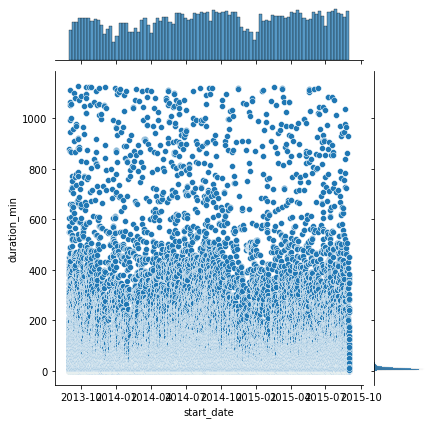

In [23]:
ax = sns.jointplot(data=sf_df, x="start_date", y="duration_min")

[(0.0, 40.0)]

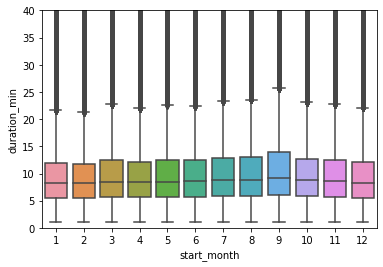

In [24]:
ax = sns.boxplot(data=sf_df, x="start_month", y="duration_min")
ax.set(ylim=(0, 40))

[(0.0, 40.0)]

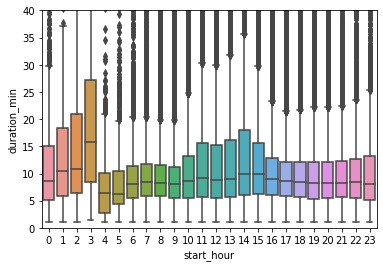

In [25]:
ax = sns.boxplot(data=sf_df, x="start_hour", y="duration_min")
ax.set(ylim=(0, 40))

We are able to see from a few of our exploratory graphs above that for both the `duration_min` vs `start_month` and `duration_min` vs `start_date`, it is hard to see any significant relationship forming. However, when looking at the duration based on the time of day, we can see that there does seem to be some sort of relationship. In particular, 6am-10am and 4pm-8pm have very similar trip durations. This makes sense as people are probably using the city bikes for commuting. We can see that there are slightly longer trips taken during the middle of day, probably for lunch breaks or other errands. Surprisingly, 1am-3am has the longest trip durations, which can probably be accounted for people taking the bikes back from a night out since other forms of transportation are not running.

### Number of rides taken based on date/month/hour

Text(0.5, 1.0, 'Count of the rides vs Month')

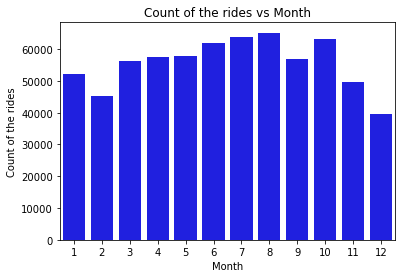

In [26]:
cnt = sf_df.groupby("start_month").size().reset_index()
sns.barplot(data=cnt, x=cnt["start_month"], y=cnt[0], color="b")
plt.ylabel("Count of the rides")
plt.xlabel("Month")
plt.title("Count of the rides vs Month")

Text(0.5, 1.0, 'Count of the rides vs Hour')

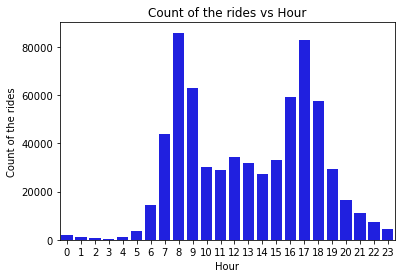

In [27]:
cnt = sf_df.groupby("start_hour").size().reset_index()
sns.barplot(data=cnt, x=cnt["start_hour"], y=cnt[0], color="b")
plt.ylabel("Count of the rides")
plt.xlabel("Hour")
plt.title("Count of the rides vs Hour")

We can take a look at the above graphs and see that the count of rides vs hour bar plot seems to be bimodal with morning rush hour and evening rush hour having spikes in usage of the bikes. We can also see that in the summer months, there seems to be a somewhat linear increase in the number of rides. However, it is interesting to see that in September, the bike are used less and in October, the number of rides increases back to the level it was in July. 

### Plots on the temperature

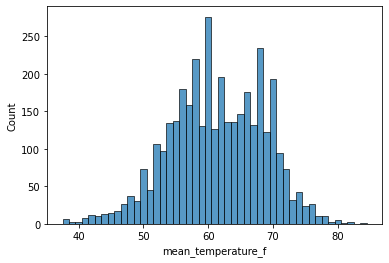

In [28]:
ax = sns.histplot(weather_df["mean_temperature_f"])

### Location information for the rides

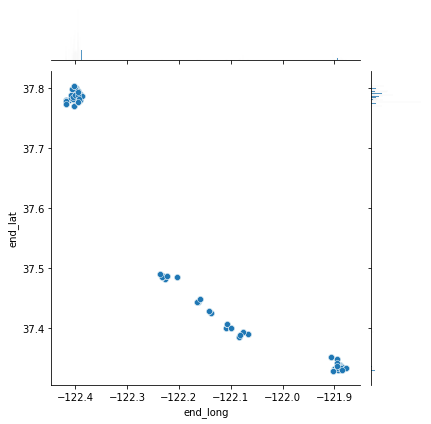

In [29]:
ax = sns.jointplot(data=sf_df, x="end_long", y="end_lat")

In [30]:
# load in the shape file for SF
road_gdf_sf = gpd.read_file("./data/sf/shape/tl_2017_06075_roads.shp")

In [31]:
start_stations = pd.DataFrame({'count' : sf_df.groupby( [ "start_long", "start_lat"] ).size()}).reset_index()
start_gdf = gpd.GeoDataFrame(start_stations,
                                 geometry=gpd.points_from_xy(start_stations["start_long"],
                                                             start_stations["start_lat"]),
                                )
# normalize count to values between 0 and 1
start_gdf["count"] = ((start_gdf["count"] - start_gdf["count"].min()) /
                        (start_gdf["count"].max()- start_gdf["count"].min()))

<AxesSubplot:>

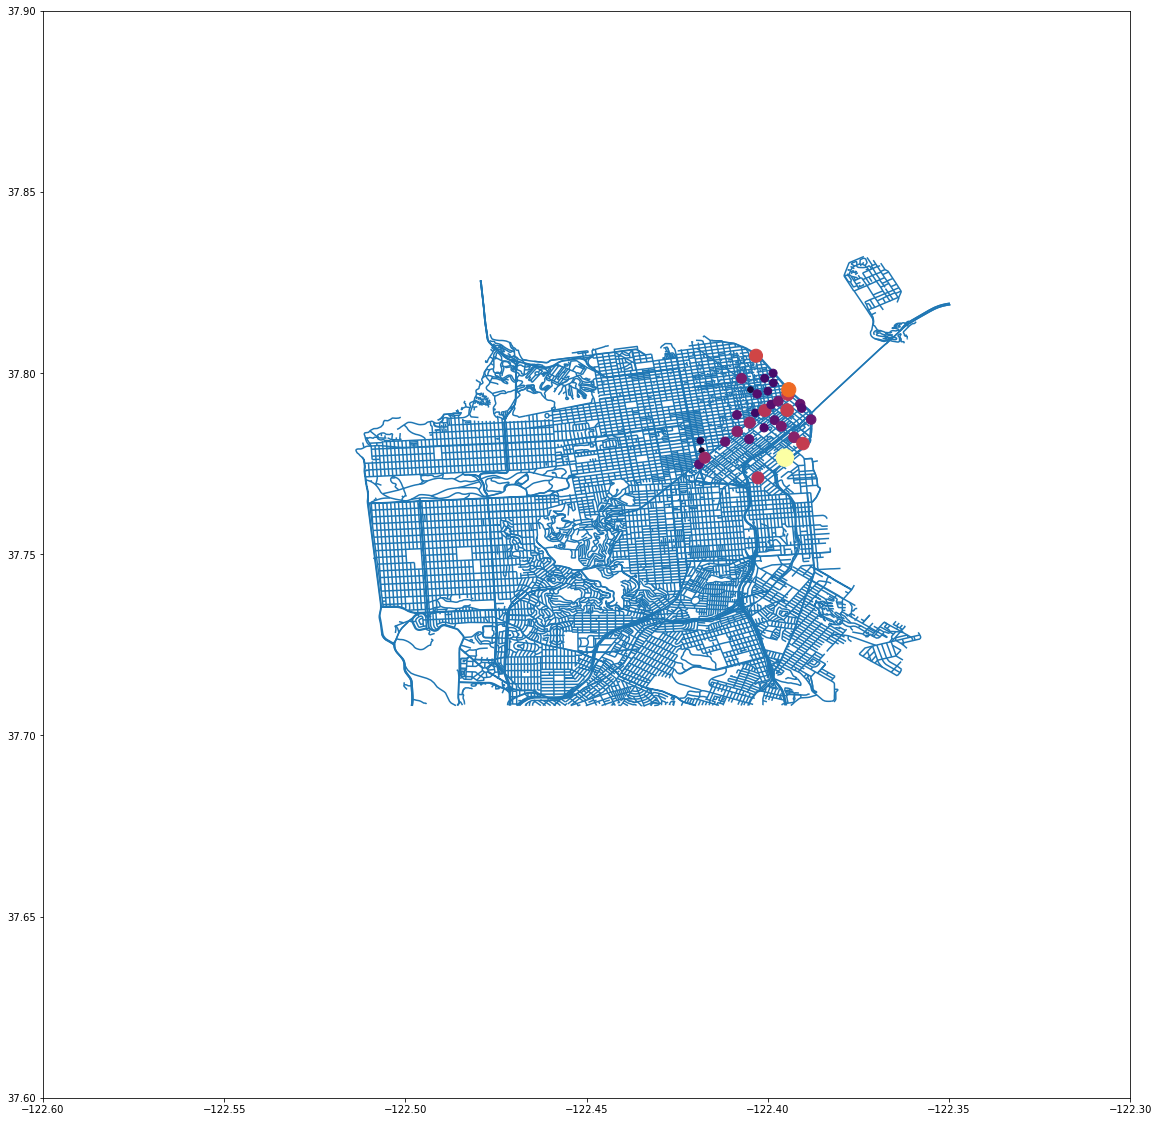

In [32]:
ax = road_gdf_sf.plot(figsize=(20, 20))
ax.set(ylim=(37.6, 37.9), xlim=(-122.6, -122.3))
start_gdf.plot(column="count", ax=ax, cmap="inferno", zorder=3, markersize=start_gdf["count"]*300)

Since the Bay Area extends down below San Francisco, there are trips that are happening there as well. For this exploratory analysis, we used a shape file for San Francisco roads and focused our graph on showing the the number of trips that are happening in SF alone. 

### Saving transformed dataset as csv

In [34]:
sf_df.sample(50000).to_csv("./data/sf/trips.csv")
weather_df.to_csv("./data/sf/weather.csv")